In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
df=pd.read_csv(r'ecommerce_data.csv',encoding = 'ISO-8859-1')

In [4]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df['InvoiceDate']=pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [9]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


In [10]:
# df_new without missing values
df_no_missing = df.dropna()

In [11]:
# check missing values for each column 
df_no_missing.isnull().sum().sort_values(ascending=False)

Country        0
CustomerID     0
UnitPrice      0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
InvoiceNo      0
dtype: int64

In [12]:
df_no_missing[df_no_missing.isnull().any(axis=1)].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [13]:
# change columns tyoe - String to Int type 
df_no_missing['CustomerID'] = df_no_missing['CustomerID'].astype('int64')

C:\Users\subhashree\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
df_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [15]:
# Rename the dataframe to make code more readable
df2 = df_no_missing.copy()

In [16]:
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [17]:
df2.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


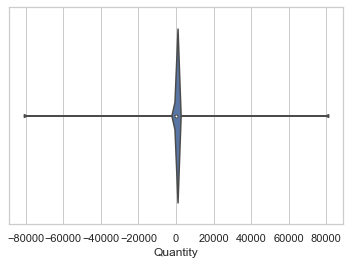

In [18]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=df2["Quantity"])

In [19]:
# remove negative quanitites

df2 = df2[df2.Quantity > 0]
df2.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


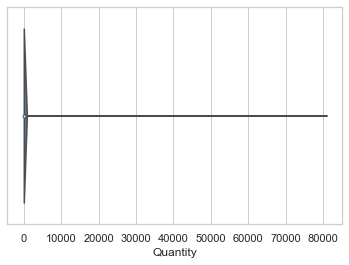

In [20]:
ax = sns.violinplot(x=df2["Quantity"])

In [21]:
df2['AmountSpent'] = df2['Quantity'] * df2['UnitPrice']
df2.head()

C:\Users\subhashree\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [22]:
# Let's add Month, Day and Hour Colummns that we'll use for further analysis
# Starting with Month_Year First
df2['month_year'] = df2['InvoiceDate'].dt.to_period('Y')
df2.head()

C:\Users\subhashree\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010


In [23]:
L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']
df2 = df2.join(pd.concat((getattr(df2['InvoiceDate'].dt, i).rename(i) for i in L), axis=1))
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,2010,12,1,2,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,2010,12,1,2,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,2010,12,1,2,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,2010,12,1,2,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,2010,12,1,2,335,48,4


In [24]:
df2.dayofweek.unique()

array([2, 3, 4, 6, 0, 1], dtype=int64)

In [25]:
# +1 to make Monday=1.....until Sunday=7
df2['dayofweek'] = df2['dayofweek'] + 1
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,2010,12,1,3,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,2010,12,1,3,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,2010,12,1,3,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,2010,12,1,3,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,2010,12,1,3,335,48,4


In [26]:
# Consolidating the number of Sales Made per customer for each country
# We use InvoiceNo as the count for sales
sales_per_cust = df2.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo', ascending=False)
sales_per_cust.columns = ['CustomerID', 'Country', "NumberOfSales"]
sales_per_cust.head(10)

,CustomerID,Country,NumberOfSales
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700
2185,15311,United Kingdom,2379
1698,14646,Netherlands,2080
570,13089,United Kingdom,1818
699,13263,United Kingdom,1677
1443,14298,United Kingdom,1637


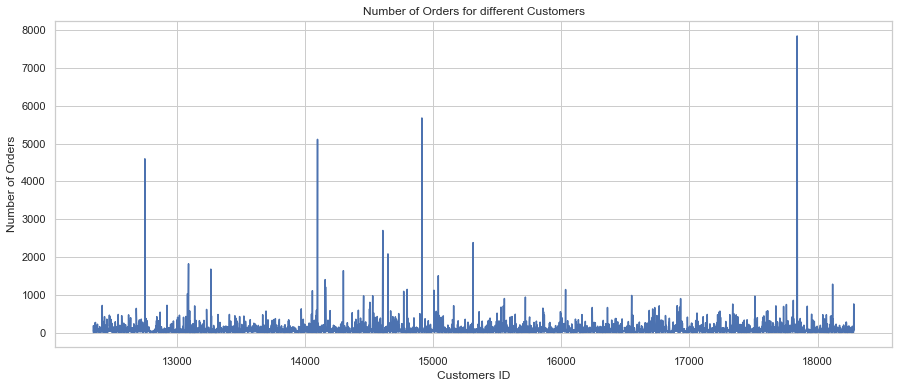

In [27]:
# Visualizing No. of Sales for all Customers

orders = df2.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

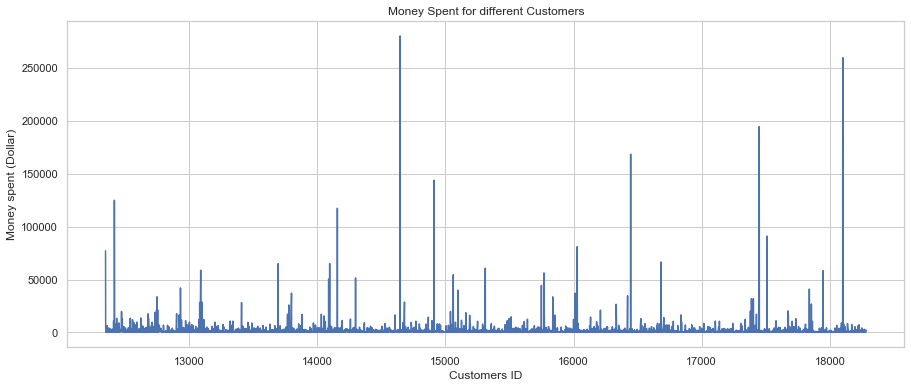

In [28]:
# Visualizing Money Spent for all Customer
money_spent = df2.groupby(by=['CustomerID','Country'], as_index=False)['AmountSpent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.AmountSpent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [29]:
# Consolidating the number of Sales Made per customer (Revenue)
# we use use index=False, to indicate to the groupby that we don't want to set the column ID as index
spent_per_cust = df2.groupby(by=['CustomerID','Country'], as_index=False)['AmountSpent'].sum().sort_values(by='AmountSpent', ascending=False)
spent_per_cust.columns = ['CustomerID', 'Country', "TotalSpent"]
spent_per_cust.head(10)

,CustomerID,Country,TotalSpent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06
57,12415,Australia,124914.53
1342,14156,EIRE,117379.63
3780,17511,United Kingdom,91062.38
2711,16029,United Kingdom,81024.84
0,12346,United Kingdom,77183.60


In [30]:
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,2010,12,1,3,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,2010,12,1,3,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,2010,12,1,3,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,2010,12,1,3,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,2010,12,1,3,335,48,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011,2011,12,9,5,343,49,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011,2011,12,9,5,343,49,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,2011,12,9,5,343,49,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,2011,12,9,5,343,49,4


In [31]:
df2.groupby('InvoiceNo')['dayofweek'].unique().value_counts().sort_index()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: dayofweek, dtype: int64

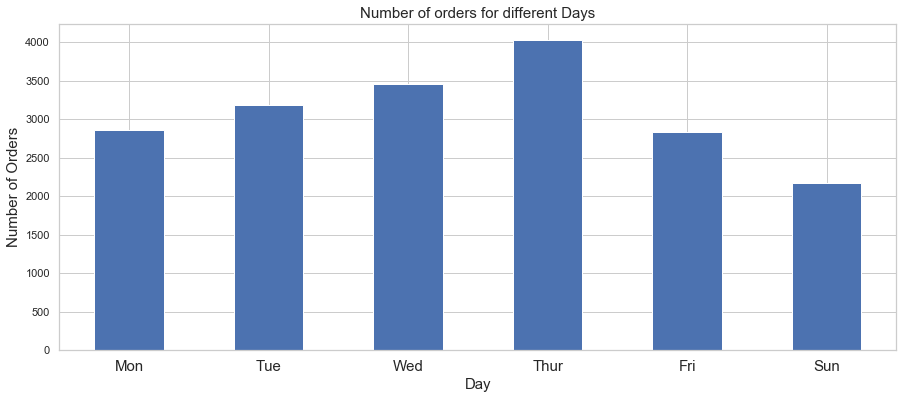

In [32]:
ax = df2.groupby('InvoiceNo')['dayofweek'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

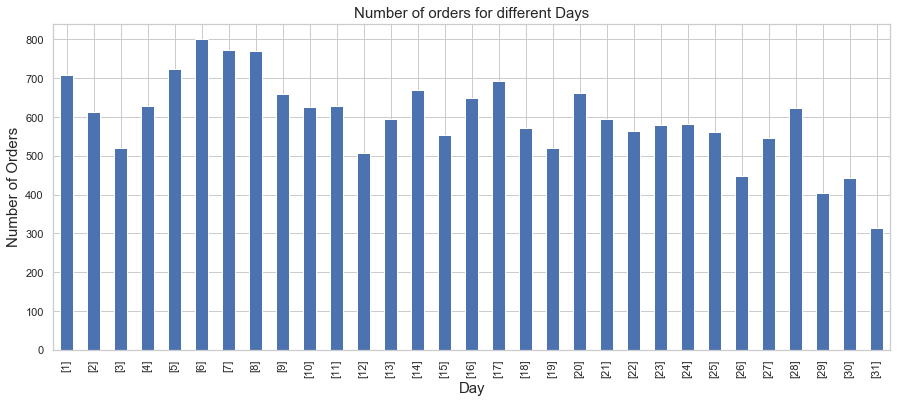

In [33]:
ax1 = df2.groupby('InvoiceNo')['day'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax1.set_xlabel('Day',fontsize=15)
ax1.set_ylabel('Number of Orders',fontsize=15)
ax1.set_title('Number of orders for different Days',fontsize=15)
#ax1.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

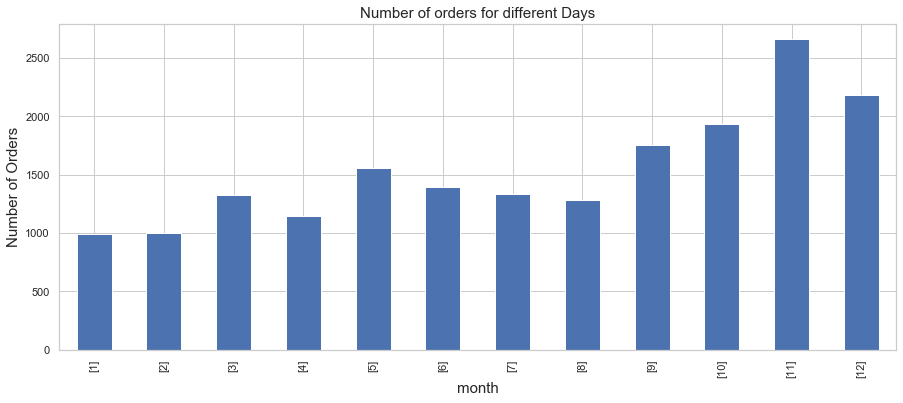

In [34]:
ax2 = df2.groupby('InvoiceNo')['month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax2.set_xlabel('month',fontsize=15)
ax2.set_ylabel('Number of Orders',fontsize=15)
ax2.set_title('Number of orders for different Days',fontsize=15)
#ax1.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

In [35]:
# Insert a new column as our 3rd row (index 2) with year_month by joining our year with month from our InvoiceDate field
df2.insert(loc=2, column='year_month', value=df2['InvoiceDate'].map(lambda x: 100*x.year + x.month))

# Insert a new column as our 6th column (index 5) with our Hour extracted from InvoiceDate
df2.insert(loc=5, column='hour', value=df2.InvoiceDate.dt.hour)

In [36]:
L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']
df2 = df2.join(pd.concat((getattr(df2['InvoiceDate'].dt, i).rename(i) for i in L), axis=1))
df2.head()

ValueError: columns overlap but no suffix specified: Index(['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear',
       'quarter'],
      dtype='object')

In [37]:
df2

,InvoiceNo,StockCode,year_month,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,8,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,2010,12,1,3,335,48,4
1,536365,71053,201012,WHITE METAL LANTERN,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,2010,12,1,3,335,48,4
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,2010,12,1,3,335,48,4
3,536365,84029G,201012,KNITTED UNION FLAG HOT WATER BOTTLE,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,2010,12,1,3,335,48,4
4,536365,84029E,201012,RED WOOLLY HOTTIE WHITE HEART.,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,2010,12,1,3,335,48,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,201112,PACK OF 20 SPACEBOY NAPKINS,12,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011,2011,12,9,5,343,49,4
541905,581587,22899,201112,CHILDREN'S APRON DOLLY GIRL,6,12,2011-12-09 12:50:00,2.10,12680,France,12.60,2011,2011,12,9,5,343,49,4
541906,581587,23254,201112,CHILDRENS CUTLERY DOLLY GIRL,4,12,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,2011,12,9,5,343,49,4
541907,581587,23255,201112,CHILDRENS CUTLERY CIRCUS PARADE,4,12,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,2011,12,9,5,343,49,4


In [38]:
# Insert a new column as our 3rd row (index 2) with year_month by joining our year with month from our InvoiceDate field
df2.insert(loc=2, column='year_month', value=df2['InvoiceDate'].map(lambda x: 100*x.year + x.month))

# Insert a new column as our 6th column (index 5) with our Hour extracted from InvoiceDate
df2.insert(loc=5, column='hour', value=df2.InvoiceDate.dt.hour)

ValueError: cannot insert year_month, already exists

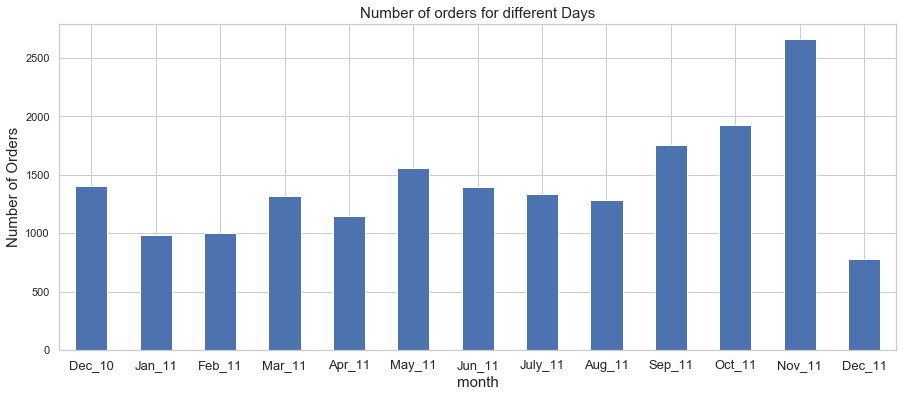

In [39]:
ax3 = df2.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax3.set_xlabel('month',fontsize=15)
ax3.set_ylabel('Number of Orders',fontsize=15)
ax3.set_title('Number of orders for different Days',fontsize=15)
ax3.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

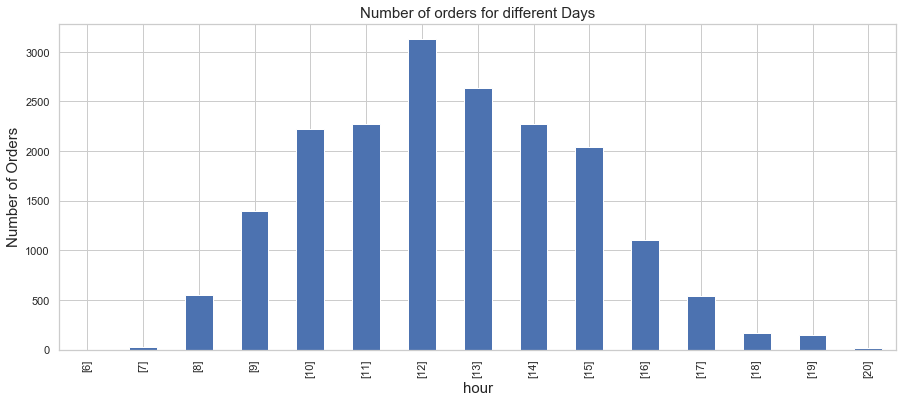

In [40]:
ax4 = df2.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',figsize=(15,6))
ax4.set_xlabel('hour',fontsize=15)
ax4.set_ylabel('Number of Orders',fontsize=15)
ax4.set_title('Number of orders for different Days',fontsize=15)
#ax3.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

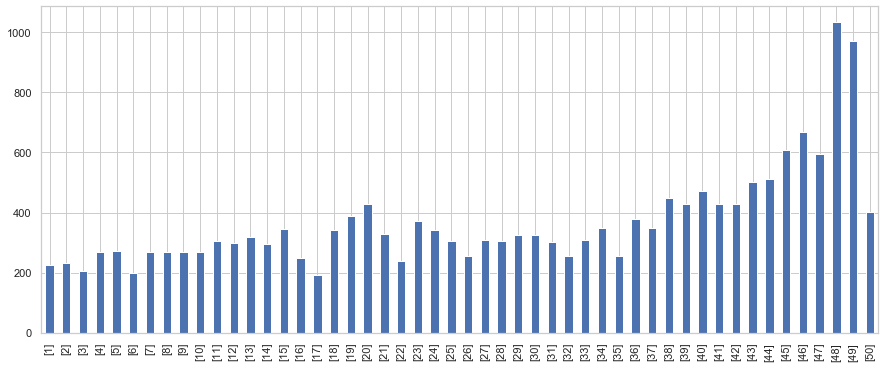

In [41]:
ax5 = df2.groupby('InvoiceNo')['weekofyear'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',figsize=(15,6))
ax5

In [42]:
df2.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

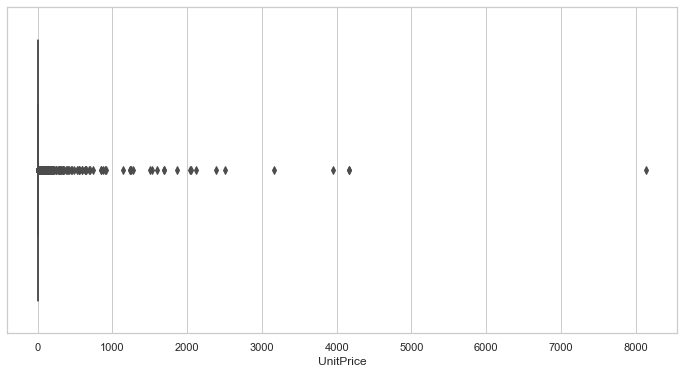

In [43]:
# check the distribution of unit price
plt.subplots(figsize=(12,6))
sns.boxplot(df2.UnitPrice)
plt.show()

In [44]:
# What are the free items
df_free = df2[df2.UnitPrice == 0]
print(len(df_free))
df_free.head()

40


,InvoiceNo,StockCode,year_month,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
9302,537197,22841,201012,ROUND CAKE TIN VINTAGE GREEN,1,14,2010-12-05 14:02:00,0.0,12647,Germany,0.0,2010,2010,12,5,7,339,48,4
33576,539263,22580,201012,ADVENT CALENDAR GINGHAM SACK,4,14,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0,2010,2010,12,16,4,350,50,4
40089,539722,22423,201012,REGENCY CAKESTAND 3 TIER,10,13,2010-12-21 13:45:00,0.0,14911,EIRE,0.0,2010,2010,12,21,2,355,51,4
47068,540372,22090,201101,PAPER BUNTING RETROSPOT,24,16,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011,2011,1,6,4,6,1,1
47070,540372,22553,201101,PLASTERS IN TIN SKULLS,24,16,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011,2011,1,6,4,6,1,1


In [45]:
# See when these free items were given out
df_free.year_month.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

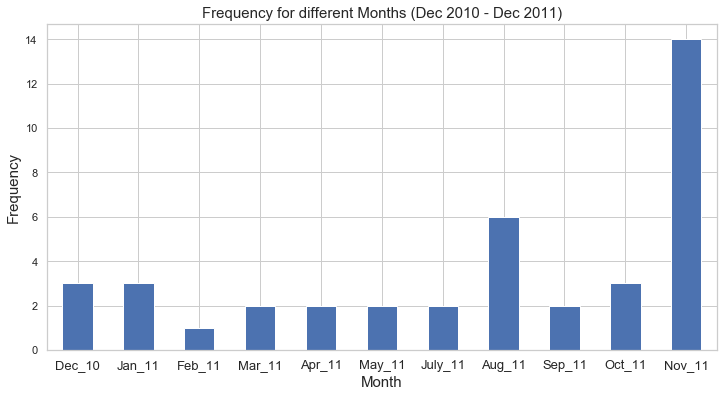

In [46]:
# Ploting the above data
ax6= df_free.year_month.value_counts().sort_index().plot(kind='bar',figsize=(12,6))
ax6.set_xlabel('Month',fontsize=15)
ax6.set_ylabel('Frequency',fontsize=15)
ax6.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax6.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

In [50]:
df_free.year_month.value_counts().describe()

count    11.000000
mean      3.636364
std       3.668044
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max      14.000000
Name: year_month, dtype: float64

Text(0.5, 1.0, 'Number of orders for different Days')

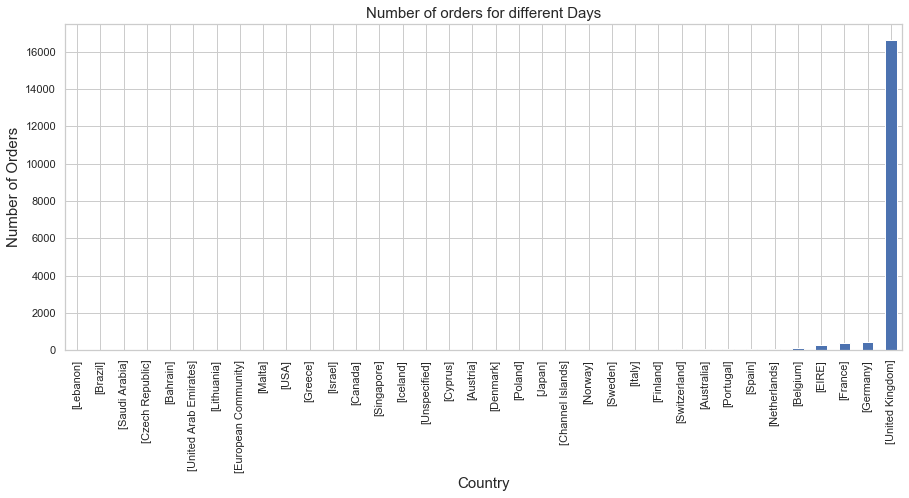

In [53]:
ax7 = df2.groupby('InvoiceNo')['Country'].unique().value_counts().iloc[:-1].sort_values().plot(kind='bar',figsize=(15,6))
ax7.set_xlabel('Country',fontsize=15)
ax7.set_ylabel('Number of Orders',fontsize=15)
ax7.set_title('Number of orders for different Days',fontsize=15)

In [54]:
ax7 = df2.groupby('InvoiceNo')['Country'].unique().value_counts()
ax7

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[United Kingdom]          16649
[Germany]                   457
[France]                    389
[EIRE]                      260
[Belgium]                    98
[Netherlands]                95
[Spain]                      90
[Australia]                  57
[Portugal]                   57
[Switzerland]                51
[Finland]                    41
[Italy]                      38
[Sweden]                     36
[Norway]                     36
[Channel Islands]            26
[Poland]                     19
[Japan]                      19
[Denmark]                    18
[Austria]                    17
[Cyprus]                     16
[Unspecified]                 8
[Iceland]                     7
[Singapore]                   7
[Canada]                      6
[Greece]                      5
[USA]                         5
[Israel]                      5
[Malta]                       5
[European Community]          4
[Lithuania]                   4
[United Arab Emirates]        3
[Bahrain

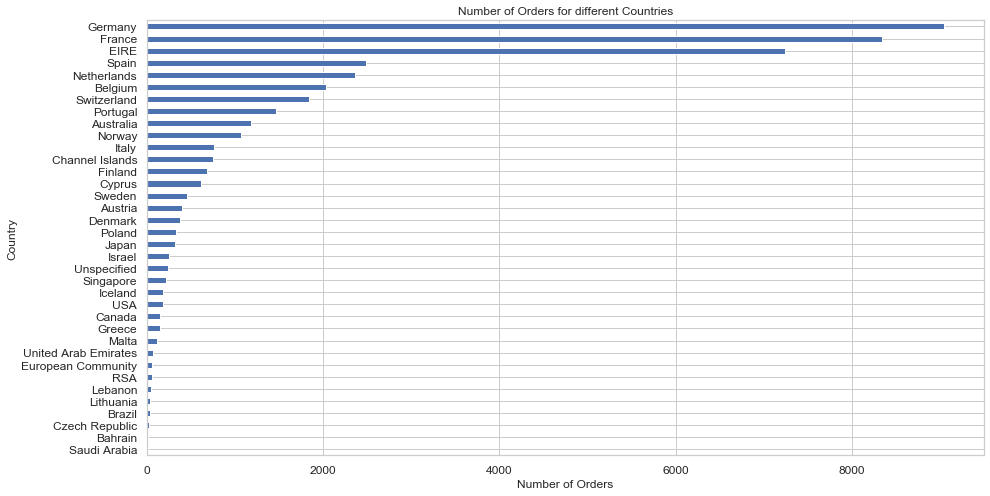

In [55]:
group_country_orders = df2.groupby('Country')['InvoiceDate'].count().sort_values()
group_country_orders_without_uk = group_country_orders.copy()
del group_country_orders_without_uk['United Kingdom']


plt.subplots(figsize=(15,8))
group_country_orders_without_uk.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

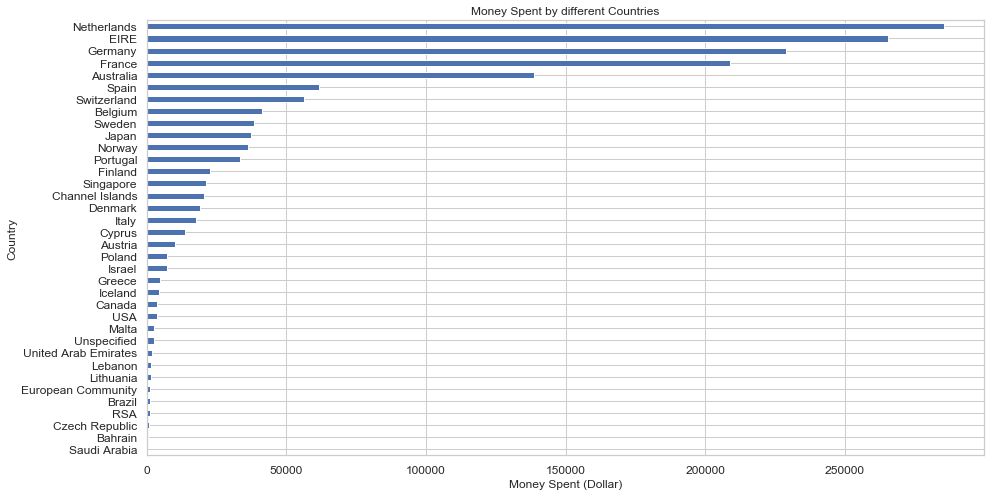

In [58]:
group_country_amount_spent = df2.groupby('Country')['AmountSpent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

In [59]:
df2

,InvoiceNo,StockCode,year_month,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,8,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,2010,12,1,3,335,48,4
1,536365,71053,201012,WHITE METAL LANTERN,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,2010,12,1,3,335,48,4
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,2010,12,1,3,335,48,4
3,536365,84029G,201012,KNITTED UNION FLAG HOT WATER BOTTLE,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,2010,12,1,3,335,48,4
4,536365,84029E,201012,RED WOOLLY HOTTIE WHITE HEART.,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,2010,12,1,3,335,48,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,201112,PACK OF 20 SPACEBOY NAPKINS,12,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011,2011,12,9,5,343,49,4
541905,581587,22899,201112,CHILDREN'S APRON DOLLY GIRL,6,12,2011-12-09 12:50:00,2.10,12680,France,12.60,2011,2011,12,9,5,343,49,4
541906,581587,23254,201112,CHILDRENS CUTLERY DOLLY GIRL,4,12,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,2011,12,9,5,343,49,4
541907,581587,23255,201112,CHILDRENS CUTLERY CIRCUS PARADE,4,12,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,2011,12,9,5,343,49,4


In [60]:
# Get our date range for our data
print('Date Range: %s to %s' % (df2['InvoiceDate'].min(), df2['InvoiceDate'].max()))

# Since Our data ends at Nov-30 2011, we're taking all of the transactions that occurred before December 01, 2011 
df2 = df2.loc[df2['InvoiceDate'] < '2011-12-01']

Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [61]:
# Get total amount spent per invoice and associate it with CustomerID and Country
invoice_customer_df = df2.groupby(by=['InvoiceNo', 'InvoiceDate']).agg({'AmountSpent': sum, 'CustomerID': max,'Country': max,}).reset_index()
invoice_customer_df.head()

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047,United Kingdom


In [62]:
# Sort on Amount spent, this gives us the largest invoices
invoice_customer_df.sort_values(by='AmountSpent', ascending=False).head(10)

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
1911,541431,2011-01-18 10:01:00,77183.60,12346,United Kingdom
7949,556444,2011-06-10 15:28:00,38970.00,15098,United Kingdom
12446,567423,2011-09-20 11:05:00,31698.16,17450,United Kingdom
8135,556917,2011-06-15 13:37:00,22775.93,12415,Australia
14487,572209,2011-10-21 12:08:00,22206.00,18102,United Kingdom
12438,567381,2011-09-20 10:12:00,22104.80,17450,United Kingdom
10869,563614,2011-08-18 08:51:00,21880.44,12415,Australia
5481,550461,2011-04-18 13:20:00,21535.90,15749,United Kingdom
14399,572035,2011-10-20 12:03:00,20277.92,14646,Netherlands
10637,563076,2011-08-11 16:12:00,19150.66,14646,Netherlands


In [63]:
# We set our index to our invoice date
# And use Grouper(freq='M') groups data by the index 'InvoiceDate' by Month
# We then group this data by CustomerID and count the number of unique repeat customers for that month (data is the month end date)
# The filter fucntion allows us to subselect data by the rule in our lambda function i.e. those greater than 1 (repeat customers)

monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
  pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

monthly_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

In [64]:
# Number of Unique customers per month
monthly_unique_customers_df = df2.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
monthly_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

# Ratio of Repeat to Unique customers
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0
monthly_repeat_percentage

# 
#Item Trends¶

In [68]:
df2

,InvoiceNo,StockCode,year_month,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,8,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,2010,12,1,3,335,48,4
1,536365,71053,201012,WHITE METAL LANTERN,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,2010,12,1,3,335,48,4
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,2010,12,1,3,335,48,4
3,536365,84029G,201012,KNITTED UNION FLAG HOT WATER BOTTLE,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,2010,12,1,3,335,48,4
4,536365,84029E,201012,RED WOOLLY HOTTIE WHITE HEART.,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,2010,12,1,3,335,48,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516364,579885,85034C,201111,3 ROSE MORRIS BOXED CANDLES,4,17,2011-11-30 17:37:00,1.25,15444,United Kingdom,5.00,2011,2011,11,30,3,334,48,4
516365,579885,21742,201111,LARGE ROUND WICKER PLATTER,2,17,2011-11-30 17:37:00,5.95,15444,United Kingdom,11.90,2011,2011,11,30,3,334,48,4
516366,579885,23084,201111,RABBIT NIGHT LIGHT,6,17,2011-11-30 17:37:00,2.08,15444,United Kingdom,12.48,2011,2011,11,30,3,334,48,4
516367,579885,21257,201111,VICTORIAN SEWING BOX MEDIUM,1,17,2011-11-30 17:37:00,7.95,15444,United Kingdom,7.95,2011,2011,11,30,3,334,48,4


In [77]:
# Now let's get quantity of each item sold per month
date_item_df = df2.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

date_item_df

InvoiceDate  StockCode   
2010-12-31   10002            224
             10120             16
             10123C             1
             10124A             4
             10124G             5
                             ... 
2011-11-30   BANK CHARGES       2
             C2                22
             DOT                4
             M               3893
             POST             460
Name: Quantity, Length: 28234, dtype: int64